<a href="https://colab.research.google.com/github/niconaufal21/MachineLearning/blob/master/Tugas_3_Nico_Naufal_of_Summit_of_Build_simple_ANN_from_Scratch_with_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import numpy

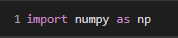

In [1]:
import numpy as np

# Membuat Dataset

![dataset](https://miro.medium.com/max/639/1*uGmgaSPI_pv25dBugw1AZQ.png)

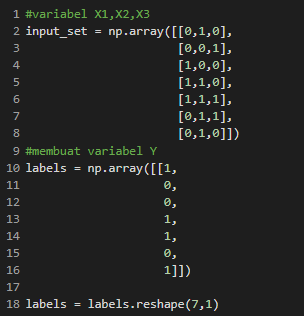

In [4]:
input_set = np.array([[0,1,0],
                      [0,0,1],
                      [1,0,0],
                      [1,1,0],
                      [1,1,1],
                      [0,1,1],
                      [0,1,0]])
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,
                    1]])
labels = labels.reshape(7,1)





Generate secara random nilai dari bobot dan bias

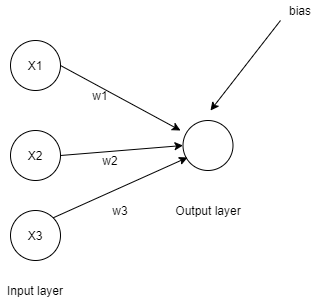



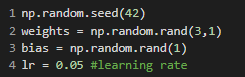

In [89]:
np.random.seed(42)
weights = np.random.rand(3,1)
bias = np.random.rand(1)
lr =0,5






In [7]:
weights

array([[0.37454012],
       [0.95071431],
       [0.73199394]])

In [8]:
bias

array([0.59865848])

# Fungsi Aktivasi

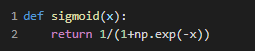

In [9]:
def sigmoid(x):
  return 1/(1+np.exp(-x))






# Menghitung turunan fungsi sigmoid

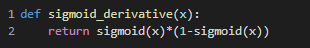

In [66]:
def sigmoid_derivative(z): 
  return sigmoid(z)*(1-sigmoid(z))





# Langkah-langkah training ANN

Penjelasan per step dari tahap-tahap training ANN

## Feedforward

1. Feed input ke model

In [13]:
inputs = input_set
print(inputs)

[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 1]
 [0 1 0]]


2. Menghitung dot product antara input_set dan bobot

In [14]:
XW = np.dot(inputs, weights)+ bias
print(XW)

[[1.54937279]
 [1.33065243]
 [0.9731986 ]
 [1.92391291]
 [2.65590685]
 [2.28136673]
 [1.54937279]]


3. Menggunakan fungsi aktivasi (sigmoid)

Sigmoid function :
![sigmoid](https://miro.medium.com/max/271/0*Z971d29-r-SS59Z-.png)

In [65]:
z = sigmoid(XW)
print(z)

[[0.82482312]
 [0.79094853]
 [0.72575659]
 [0.87257414]
 [0.93437412]
 [0.90732204]
 [0.82482312]]


## Backpropagation

1. Evaluasi dengan menghitung loss function

![MSE](https://miro.medium.com/max/581/0*DGjzN-ppsTBxYsFp.png)

In [16]:
error = z - labels
print(error)


[[-0.17517688]
 [ 0.79094853]
 [ 0.72575659]
 [-0.12742586]
 [-0.06562588]
 [ 0.90732204]
 [-0.17517688]]


In [17]:
print(error.sum())

1.8806216715619812


2. Update bobot dengan gradient descent

![gsd](https://miro.medium.com/max/414/0*RpdL_oGbesW7sQhF.png)

In [94]:
dcost = error
dpred = sigmoid_derivative(z)
z_del = dcost * dpred
inputs = input_set.T
weights = weights - (lr*np.dot(inputs, z_del))

  
    
  

In [19]:
# Nilai bobot baru 
print(weights)

[[0.37454012]
 [0.95071431]
 [0.73199394]]


3. Update nilai bias

In [95]:
for num in z_del:
       bias = bias - lr*num

# Nilai bias baru
print(bias)

[0.59865848 0.18734989]


#Training ANN dengan epoch = 25000

Training ANN dengan Feedforward dan Backpropagation

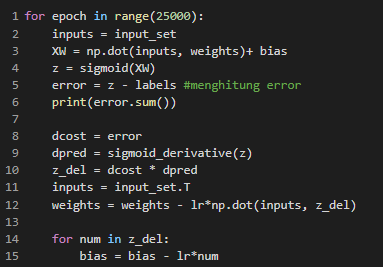

In [93]:
for epoch in range(25000):
    inputs = input_set
    XW = np.dot(inputs, weights)+ bias
    z = sigmoid(XW)
    error = z - labels
    print(error.sum())

    dcost_dpred = error
    dpred_dz = sigmoid_derivative(z)
    z_del = dcost * dpred
    inputs = input_set.T
weights = weights - (lr*np.dot(inputs, z_del))
    
for num in z_del:
   bias = bias - lr*num

Streaming output truncated to the last 5000 lines.
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062
0.5281494510385062

# Membuat Prediksi dari model yang telah dilatih

Data dengan fitur : X1 = 1, X2 = 0, X3 = 0

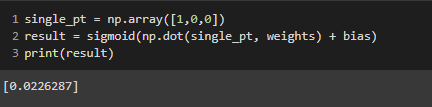

In [86]:
single_pt = np.array([1,0,0])
result = sigmoid(np.dot(single_pt, weights) + bias)
print(result)





[0.72575659]


Data dengan fitur : X1 = 0, X2 = 1, X3 = 0

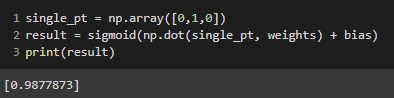

In [96]:
single_pt = np.array([0,1,0])
result =sigmoid(np.dot(single_pt,weights) + bias)